# Testing the different shieling inputs

In [1]:
import numpy                as np
import matplotlib.pyplot    as plt
from astropy import units   as units
import sys
from pathlib            import Path
from matplotlib         import rcParams, rc
from scipy.interpolate  import CubicSpline
# Change the matplotlib default parameters
rcParams.update({'font.size':   8})
rcParams.update({'figure.dpi': 120})

sys.path.append('/lhome/silkem/ChemTorch/ChemTorch/')
from read               import read_data_chemtorch
from src.rates          import *
from solve_n_save       import solve
from src.input          import density

rate = 16

outloc = '/lhome/silkem/ChemTorch/ChemTorch/out/'

In [2]:
def interpolate(t,abs):
    spl= list()
    for el in abs:
        spl.append(CubicSpline(t, el))
    return spl

In [3]:
## general input values

Mdot = 1.e-7
r = 1.e15
T = 2000
δ = 1
Av = 0.05
chemtype = 'C'
Δt = 1.e1
logmessage = 'Testing relevance shielding parameters'
loc = 'shielding_tests/'+chemtype+'_'


In [4]:
v = 3
C13C12 = 35
ρ = density(Mdot, v,r)

filename = 'v3_Crat35'

ts, ys, time, specs = solve(ρ, T, δ, Av, v, C13C12, chemtype, Δt, rate, filename, logmessage = logmessage)


AttributeError: module 'shielding' has no attribute 'retrieve_rate'

In [4]:
# out_ct = 'chemtorch13-O-rho5.63E+06-T2500-d1-Av0.5'
out_ct = 'chemtorch13-C-rho5.63E+06-T2500-d1-Av1'
t_ct, abs_ct = read_data_chemtorch(outloc+out_ct+'.out')

In [5]:
spl_ct = interpolate(t_ct, abs_ct)
spl_dc = interpolate(t_dc, abs_dc)

In [ ]:
specs_dict = dict()
for i in range(len(specs)):
    specs_dict[specs[i]] = i

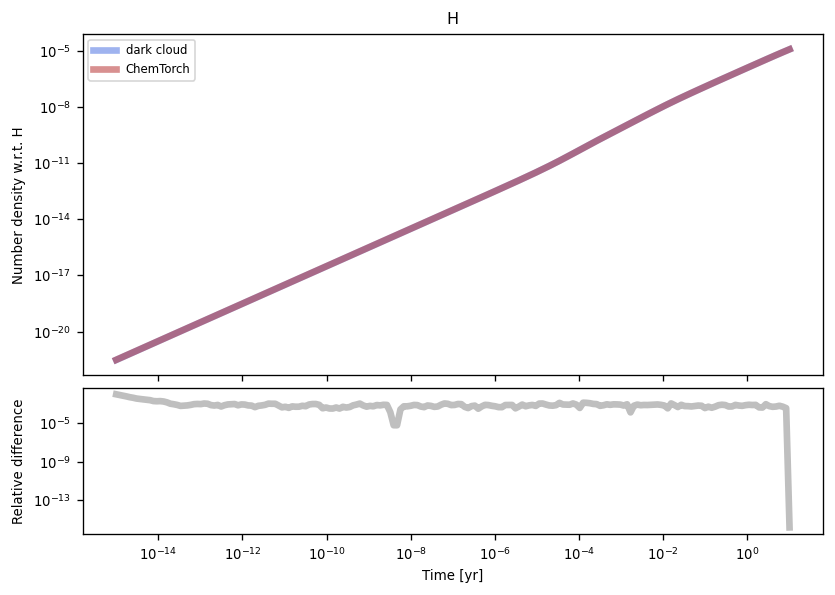

In [7]:
spec = 'H'
idx_spec = specs_dict[spec]
x = np.logspace(-15.,1., 200)

lw = 4
α = 0.5

fig, axs = plt.subplots(2,1, gridspec_kw={'height_ratios': [7,3]},figsize=(7, 5))
ax1 = axs[0]
ax2 = axs[1]

ax1.set_title(spec)

ax1.plot(x, spl_dc[idx_spec](x), label = 'dark cloud', lw = lw, alpha = α, color = 'royalblue')
ax1.plot(x, spl_ct[idx_spec](x), label = 'ChemTorch' , lw = lw, alpha = α, color = 'firebrick')
diff = (np.abs(spl_dc[idx_spec](x)-spl_ct[idx_spec](x)))
mean = (np.abs(spl_dc[idx_spec](x)+spl_ct[idx_spec](x)))/2
ax2.plot(x,diff/mean, lw = lw, alpha = α, c='grey')

for ax in axs:
    ax.set_yscale('log')
    ax.set_xscale('log')
ax1.set(xticklabels=[])
# ax1.set_ylim((1.e-50, 1.0e-2))
# ax1.set_xlim((1.e-15, 1.e1))

ax2.set_xlabel('Time [yr]')
ax1.set_ylabel('Number density w.r.t. H')
ax1.legend(fontsize = 7)
ax2.set_ylabel('Relative difference')

fig.tight_layout()
fig.subplots_adjust(hspace=0.05)


plt.show()